In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Problema 1**

In [4]:
def canalesImagen(img, canal):
    alto = img.shape[0]
    ancho = img.shape[1]
    imgRespuesta = np.zeros((alto, ancho,3))
    for i in range(0,alto):
        for j in range(0,ancho):
            pixel = img[i,j]
            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]
            if(canal==1):
                imgRespuesta[i,j] = [blue,0,0]
            elif(canal==2):
                imgRespuesta[i,j] = [0,green,0]
            elif(canal==3):
                imgRespuesta[i,j] = [0,0,red]
            elif(canal==10):
                imgRespuesta[i,j] = [0,green,red]
            elif(canal==20):
                imgRespuesta[i,j] = [blue,green,0]
            elif(canal==30):
                imgRespuesta[i,j] = [blue,0,red]
            else:
                imgRespuesta[i,j] = [blue,green,red]
    return imgRespuesta
                

In [5]:
imgTest = cv2.imread("paris.jpg")

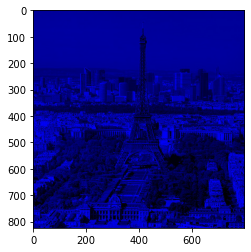

In [6]:
testCanal = canalesImagen(imgTest,1)
cv2.imwrite("test.jpg",testCanal)
testImage = cv2.imread("test.jpg")
testImage = cv2.cvtColor(testImage, cv2.COLOR_BGR2RGB)
plt.imshow(testImage)
plt.show()

**Problema 2**

In [1]:
def gray3dToRGB(imgB, imgR, imgG):
    alto = imgB.shape[0]
    ancho = imgB.shape[1]
    imgRespuesta = np.zeros((alto, ancho,3))
    for i in range(0,alto):
        for j in range(0,ancho):
            blue = imgB[i,j][0]
            red = imgR[i,j][0]
            green = imgG[i,j][0]
            imgRespuesta[i,j] =[blue, green, red]
    return imgRespuesta

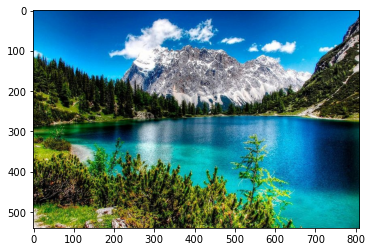

In [10]:
imgB = cv2.imread("imagen1/imagen1_salida_gray_azul.jpg")
imgR = cv2.imread("imagen1/imagen1_salida_gray_rojo.jpg")
imgG = cv2.imread("imagen1/imagen1_salida_gray_verde.jpg")
imgRGB = gray3dToRGB(imgB, imgR, imgG)
cv2.imwrite("testRGB.jpg",imgRGB)
testImageRGB = cv2.imread("testRGB.jpg")
testImageRGB = cv2.cvtColor(testImageRGB, cv2.COLOR_BGR2RGB)
plt.imshow(testImageRGB)
plt.show()

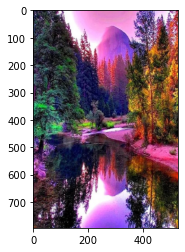

In [14]:
imgB = cv2.imread("imagen2/imagen2_salida_gray_azul.jpg")
imgR = cv2.imread("imagen2/imagen2_salida_gray_rojo.jpg")
imgG = cv2.imread("imagen2/imagen2_salida_gray_verde.jpg")
imgRGB2 = gray3dToRGB(imgB, imgR, imgG)
cv2.imwrite("testRGB2.jpg",imgRGB2)
testImageRGB = cv2.imread("testRGB2.jpg")
testImageRGB = cv2.cvtColor(testImageRGB, cv2.COLOR_BGR2RGB)
plt.imshow(testImageRGB)
plt.show()

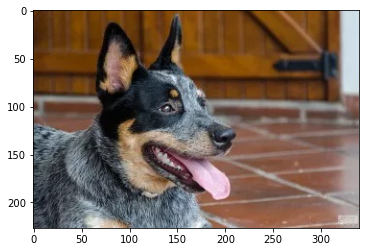

In [15]:
imgB = cv2.imread("perro/perro_salida_gray_azul.jpg")
imgR = cv2.imread("perro/perro_salida_gray_rojo.jpg")
imgG = cv2.imread("perro/perro_salida_gray_verde.jpg")
imgRGB3 = gray3dToRGB(imgB, imgR, imgG)
cv2.imwrite("testRGB3.jpg",imgRGB3)
testImageRGB = cv2.imread("testRGB3.jpg")
testImageRGB = cv2.cvtColor(testImageRGB, cv2.COLOR_BGR2RGB)
plt.imshow(testImageRGB)
plt.show()

**Problema 3**

In [26]:
imgRGB_P3 = cv2.imread("marTest.jpg")

def RGBToGray3D(img):

    alto = imgRGB_P3.shape[0]
    ancho = imgRGB_P3.shape[1]
    imgGrayB =  np.zeros((alto, ancho, 3))
    imgGrayG = np.zeros((alto, ancho, 3))
    imgGrayR = np.zeros((alto, ancho, 3))
    for i in range(0,alto):
        for j in range(0,ancho):
            pixel = imgRGB_P3[i,j] 
            imgGrayB[i,j] = [pixel[2],pixel[2],pixel[2]]
            imgGrayG[i,j] = [pixel[1],pixel[1],pixel[1]]
            imgGrayR[i,j] = [pixel[0],pixel[0],pixel[0]]                            
    return imgGrayB, imgGrayG, imgGrayR

imgGrayB, imgGrayG, imgGrayR = RGBToGray3D(imgRGB_P3)
cv2.imwrite("imgGrayB.jpg",imgGrayB)
cv2.imwrite("imgGrayG.jpg",imgGrayG)
cv2.imwrite("imgGrayR.jpg",imgGrayR)
                                   

True

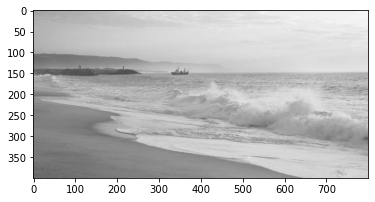

In [27]:
testImageRGB = cv2.imread("imgGrayG.jpg")
testImageRGB = cv2.cvtColor(testImageRGB, cv2.COLOR_BGR2RGB)
plt.imshow(testImageRGB)
plt.show()

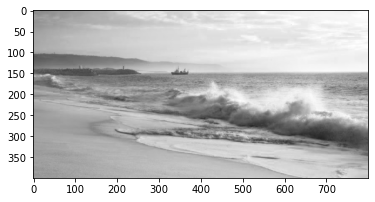

In [28]:
testImageRGB = cv2.imread("imgGrayB.jpg")
testImageRGB = cv2.cvtColor(testImageRGB, cv2.COLOR_BGR2RGB)
plt.imshow(testImageRGB)
plt.show()

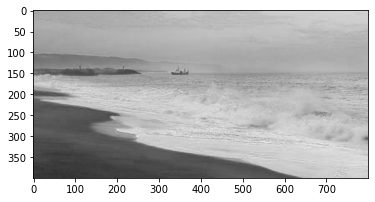

In [29]:
testImageRGB = cv2.imread("imgGrayR.jpg")
testImageRGB = cv2.cvtColor(testImageRGB, cv2.COLOR_BGR2RGB)
plt.imshow(testImageRGB)
plt.show()

**Problema 4**

In [112]:
def Histos(img):
    alto = img.shape[0]
    ancho = img.shape[1]
    imgB =  np.zeros((alto, ancho), dtype=float)
    imgG = np.zeros((alto, ancho), dtype=float)
    imgR = np.zeros((alto, ancho), dtype=float)
    imgGray = np.zeros((alto,ancho), dtype=float)
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i, j]
            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]
            imgB[i,j] = blue
            imgG[i,j] = green
            imgR[i,j] = red
            imgGray[i,j] = int(round(np.mean((blue,green,red)),0))
            
    ## Histogramas
    img_n = cv2.normalize(src=imgB, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    histGray = cv2.calcHist([img_n], [0], None, [256], [0,256])
    plt.plot(histGray,color="gray")
    plt.axvline(img_n.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.xlabel("Intensidad de Pixel")
    plt.ylabel("Densidad")
    plt.title("Canal azul")
    plt.show()
    
    img_n = cv2.normalize(src=imgG, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    histGray = cv2.calcHist([img_n], [0], None, [256], [0,256])
    plt.plot(histGray,color="gray")
    plt.axvline(img_n.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.xlabel("Intensidad de Pixel")
    plt.ylabel("Densidad")
    plt.title("Canal verde")
    plt.show()
    
    img_n = cv2.normalize(src=imgR, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    histGray = cv2.calcHist([img_n], [0], None, [256], [0,256])
    plt.plot(histGray,color="gray")
    plt.axvline(img_n.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.xlabel("Intensidad de Pixel")
    plt.ylabel("Densidad")
    plt.title("Canal rojo")
    plt.show()
    
    
    
    img_n = cv2.normalize(src=imgGray, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    histGray = cv2.calcHist([img_n], [0], None, [256], [0,256])
    plt.plot(histGray,color="gray")
    plt.axvline(img_n.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.xlabel("Intensidad de Pixel")
    plt.ylabel("Densidad")
    plt.title("Imagen escala de grises (Media aritmetica)")
    plt.show()


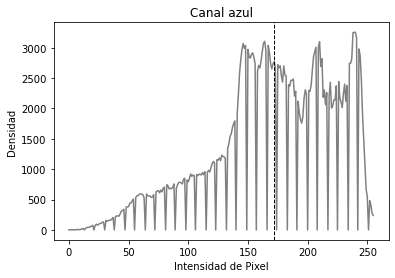

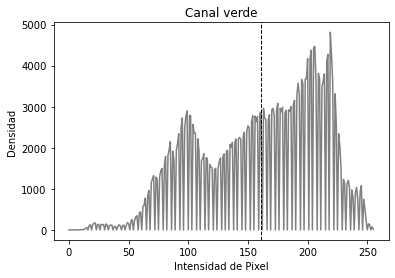

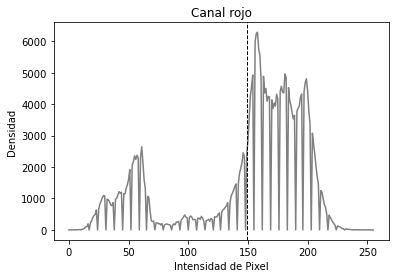

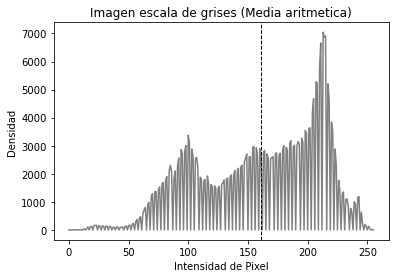

In [113]:
imgHistos = cv2.imread("marTest.jpg")
Histos(imgHistos)

**Problema 5 (Gris ponderado)**

In [114]:
#Visto en clase

def grisPonderado(img):
    alto = imgRGB_P3.shape[0]
    ancho = imgRGB_P3.shape[1]
    gris_ponderado = np.zeros((alto, ancho, 1))
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i, j]

            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]

            #escala de grises ponderada
            gris_ponderado[i, j] = int(0.299*blue + 0.587*green + 0.114*red)
            
    return gris_ponderado

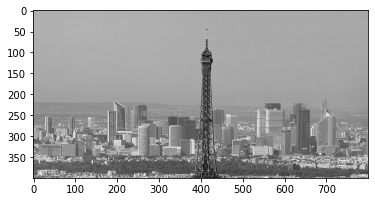

In [117]:
img = cv2.imread('paris.jpg')
img_GrisP = grisPonderado(img)
cv2.imwrite("gris_ponderado.jpg", img_GrisP)
monocromo = cv2.imread("gris_ponderado.jpg")
monocromo = cv2.cvtColor(monocromo, cv2.COLOR_BGR2RGB)
plt.imshow(monocromo)
plt.show()

**Problema 6**

# Espacio de color HSV
Representación tridimensional del color basado en los componentes de tinte, matiz o tonalidad (hue, en inglés), saturación (saturation) y brillo o valor (value).

Fue definido en 1978 por Alvy Ray Smith.

El modelo de color HSV es una transformación no lineal del modelo RGB en coordenadas cilíndricas de manera que cada color viene definido por las siguientes dimensiones:

* Tinte o matiz: Ángulo que representa el matiz, normalmente definido entre 0 y 360.
* Saturación: Nivel saturación del color, dado entre 0 y 1, 0 representa sin saturación alguna (blanco), hasta 1 que sería el matiz en toda su intensidad. Es común también darlo en percentiles 0%-100%.
* Brillo: Nivel del brillo entre 0 y 1. 0 es negro; 1, blanco. Al igual que la saturación puede darse en porcientos entre 0% y 100%. De esta forma el 50% indica el nivel medio o normal del brillo del color.

<img src=https://www.researchgate.net/profile/Federico-Alejandro-Vazquez-Saraullo/publication/351785444/figure/fig1/AS:1026667619303427@1621788043531/Espacios-de-colores-RGB-y-HSV.jpg>